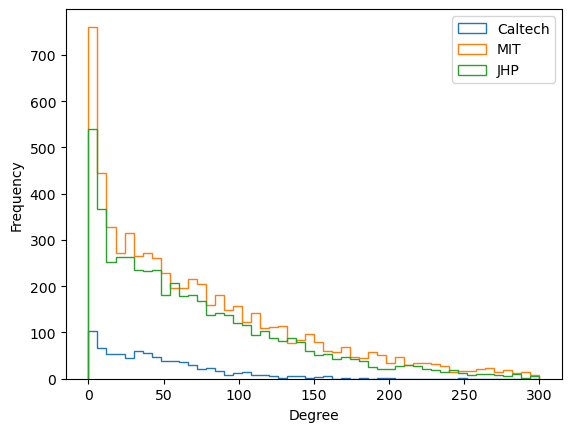

In [82]:
#Question 2: Social Network Analysis with the Facebook100 Dataset
#(a) For these three networks plot the degree distribution for each of the three networks that you downloaded. What are you able to conclude from these degree
#distributions


import networkx as nx
import matplotlib.pyplot as plt

# Load the networks
Load_caltech = nx.read_graphml (r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Caltech36.graphml")
Load_mit = nx.read_graphml (r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\MIT8.graphml")
Load_jhp = nx.read_graphml (r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Johns Hopkins55.graphml")

# Calculate the degree of each node in the network
degree_of_caltech = [d[1] for d in Load_caltech .degree()]
degree_of_mit = [d[1] for d in Load_mit.degree()]
degree_of_jhp = [d[1] for d in Load_jhp.degree()]

# Plot the degree distribution
plt.hist(degree_of_caltech, bins=50, range=[0,300], histtype='step', label='Caltech')
plt.hist(degree_of_mit, bins=50, range=[0,300], histtype='step', label='MIT')
plt.hist(degree_of_jhp, bins=50, range=[0,300], histtype='step', label='JHP')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [83]:
#Compute the global clustering coefficient and mean local clustering coefficient
#for each of the two networks. In addition compute the edge density of each
#network.

import networkx as nx

# Compute global clustering coefficient for Caltech network
trg_caltech = sum(nx.triangles(Load_caltech).values())/3
numbre_of_edges_of_caltech = Load_caltech.number_of_edges()
global_caltech = trg_caltech / numbre_of_edges_of_caltech

# Compute mean local clustering coefficient for Caltech network
clustering_caltech = nx.clustering(Load_caltech)
mean_caltech = sum(clustering_caltech.values())/Load_caltech.number_of_nodes()

# Compute edge density for Caltech network
density_caltech = numbre_of_edges_of_caltech / (Load_caltech.number_of_nodes() * (Load_caltech.number_of_nodes() - 1)/ 2)

print("Global clustering coefficient for Caltech network: ", global_caltech)
print("Mean local clustering coefficient for Caltech network: ", mean_caltech)
print("Edge density for Caltech network: ", density_caltech)

# Compute global clustering coefficient for MIT network
trg_mit = sum(nx.triangles(Load_mit).values())/3
numbre_of_edges_of_mit = Load_mit.number_of_edges()
global_mit = trg_mit / numbre_of_edges_of_mit

# Compute mean local clustering coefficient for MIT network
clustering_mit = nx.clustering(Load_mit)
mean_mit = sum(clustering_mit.values())/Load_mit.number_of_nodes()

# Compute edge density for MIT network
density_mit = numbre_of_edges_of_mit / (Load_mit.number_of_nodes() * (Load_mit.number_of_nodes() - 1)/ 2)

print("Global clustering coefficient for MIT network: ", global_mit)
print("Mean local clustering coefficient for MIT network: ", mean_mit)
print("Edge density for MIT network: ", density_mit)


# Compute global clustering coefficient for Johns Hopkins network
trg_johns_hopkins = sum(nx.triangles(Load_jhp).values())/3
num_of_edges_of_johns_hopkins = Load_jhp.number_of_edges()
global_johns_hopkins = trg_johns_hopkins / num_of_edges_of_johns_hopkins 

# Compute mean local clustering coefficient for Johns Hopkins network
clustering_johns_hopkins = nx.clustering(Load_jhp)
mean_johns_hopkins = sum(clustering_johns_hopkins.values())/Load_jhp.number_of_nodes()

# Compute edge density for Johns Hopkins network
density_johns_hopkins = num_of_edges_of_johns_hopkins  / (Load_jhp.number_of_nodes() * (Load_jhp.number_of_nodes() - 1)/ 2)


print("Global clustering coefficient for Johns Hopkins network: ", global_johns_hopkins)
print("Mean local clustering coefficient for Johns Hopkins network: ", mean_johns_hopkins)
print("Edge density for Johns Hopkins network: ", density_johns_hopkins)



Global clustering coefficient for Caltech network:  7.178374159462056
Mean local clustering coefficient for Caltech network:  0.40929439048517247
Edge density for Caltech network:  0.05640442132639792
Global clustering coefficient for MIT network:  9.43509703405346
Mean local clustering coefficient for MIT network:  0.2712187419501315
Edge density for MIT network:  0.012118119495041378
Global clustering coefficient for Johns Hopkins network:  8.8312359984136
Mean local clustering coefficient for Johns Hopkins network:  0.26839307371293525
Edge density for Johns Hopkins network:  0.013910200162372396


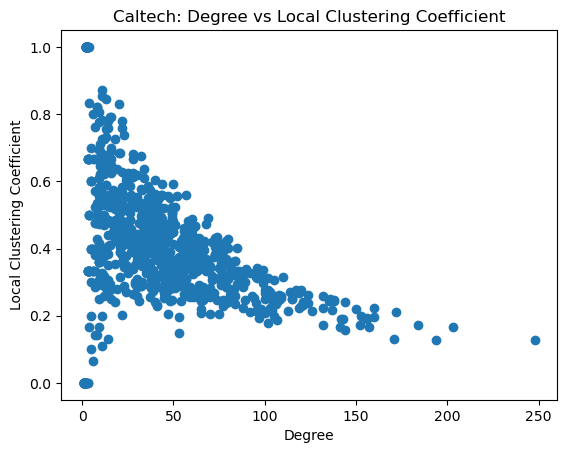

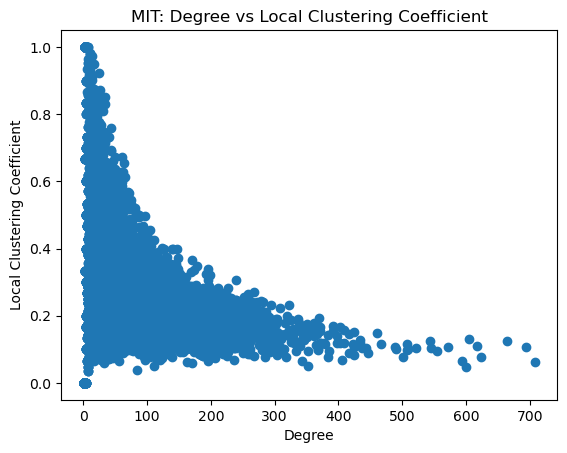

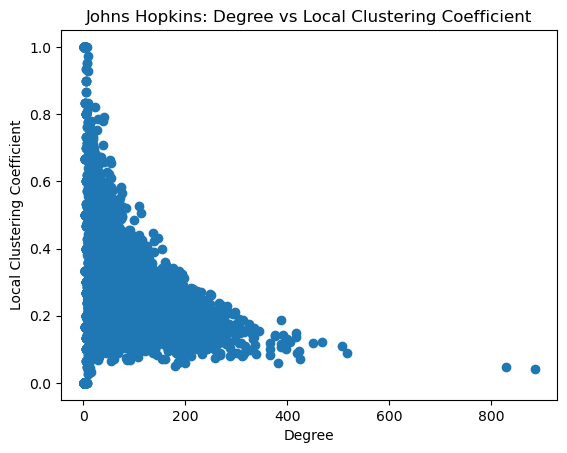

In [84]:
#For each network, also draw a scatter plot of the degree versus local clustering
#coefficient

# Create a scatter plot of degree vs local clustering coefficient for Caltech network
plt.scatter(degree_of_caltech, list(clustering_caltech.values()))
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('Caltech: Degree vs Local Clustering Coefficient')
plt.show()

# Create a scatter plot of degree vs local clustering coefficient for MIT network
plt.scatter(degree_of_mit, list(clustering_mit.values()))
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('MIT: Degree vs Local Clustering Coefficient')
plt.show()

# Create a scatter plot of degree vs local clustering coefficient for Johns Hopkins network
plt.scatter(degree_of_jhp, list(clustering_johns_hopkins.values()))
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('Johns Hopkins: Degree vs Local Clustering Coefficient')
plt.show()

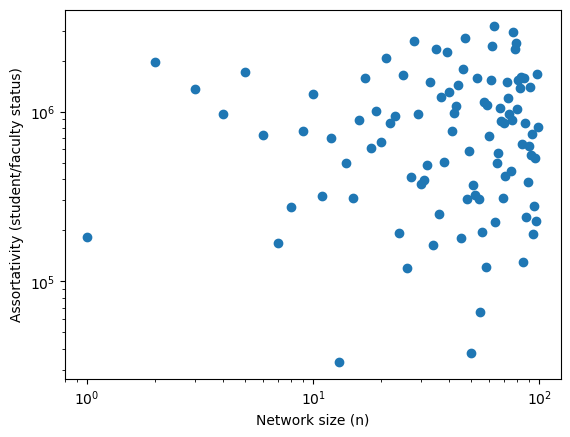

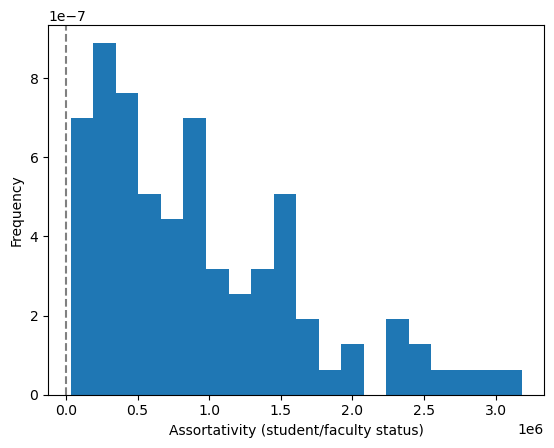

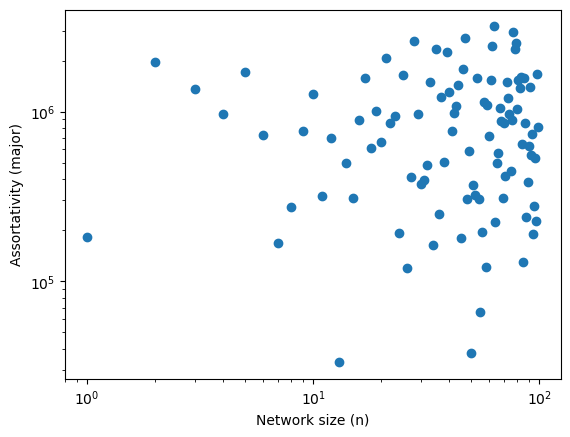

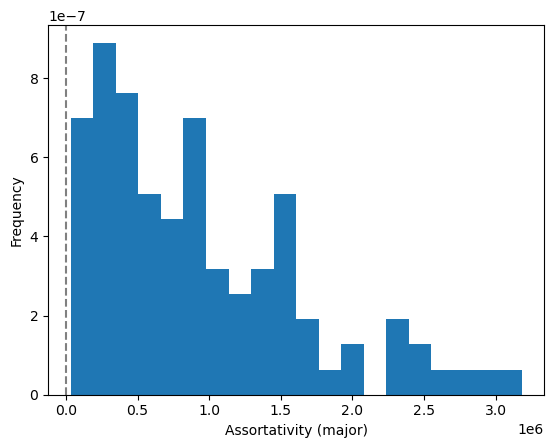

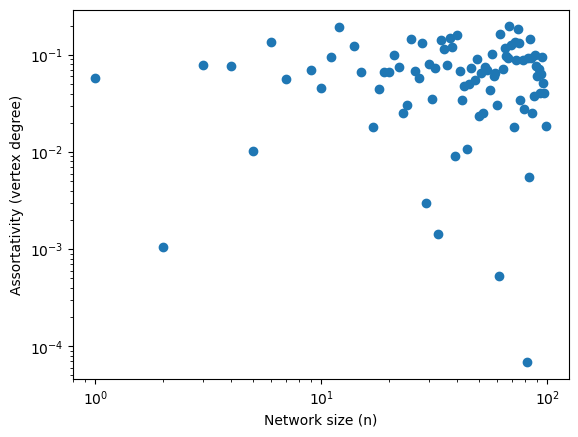

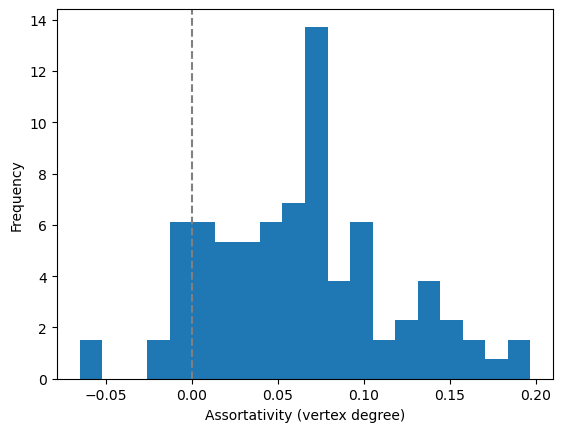

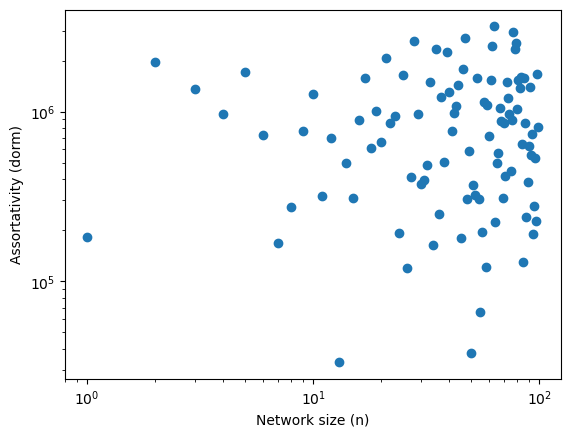

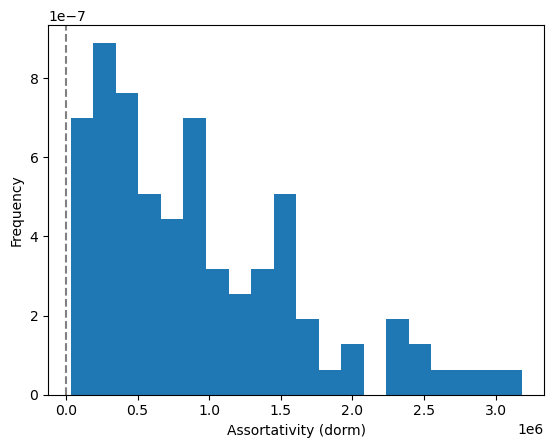

Attribute	mean	std dev
student/faculty status	939689.74	723440.47
major	939689.74	723440.47
vertex degree	0.06	0.05
dorm	939689.74	723440.47


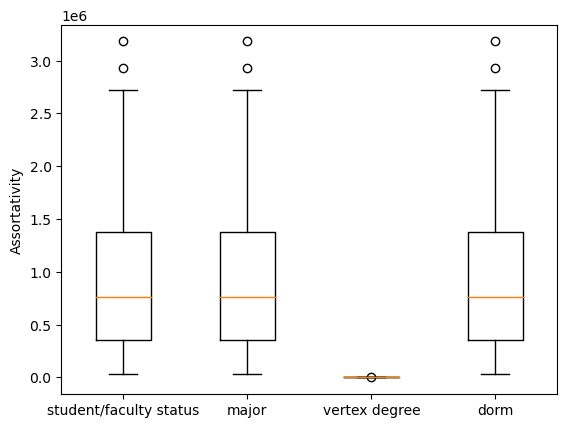

In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

# function to calculate assortativity for a given attribute

def calc_assortativity(G, attribute_val):
    # Convert the string to a dictionary
    attributes_dict = {}
    for node in G.nodes:
        attributes_dict[node] = attribute_val

    # Store the degree and attribute sum for each node
    degrees = dict(G.degree)
    attributes = {node: attributes_dict[node] for node in G.nodes}
    attribute_sum = {attribute: 0 for attribute in set(attributes.values())}
    for node in G.nodes:
        attribute_sum[attributes[node]] += degrees[node]
    # Compute the assortativity coefficient
    num = 0
    denom = 0
    for attribute in attribute_sum:
        num += attribute_sum[attribute]**2
        denom += attribute_sum[attribute]
    return num / denom - 1


# load the FB100 dataset
Load_data_folder = r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100"
assort_values = {"student/faculty status": [], "major": [], "vertex degree": [], "dorm": []}

for file in os.listdir(Load_data_folder):
    if file.endswith(".graphml"):
        G = nx.read_graphml(os.path.join(Load_data_folder, file))
        G = nx.Graph(G)
        assort_values["student/faculty status"].append(calc_assortativity(G, "student/faculty status"))
        assort_values["major"].append(calc_assortativity(G, "major"))
        assort_values["vertex degree"].append(nx.degree_assortativity_coefficient(G))
        assort_values["dorm"].append(calc_assortativity(G, "dorm"))

# create scatter plot showing assortativity vs network size
plt.scatter(list(range(len(assort_values["student/faculty status"]))), assort_values["student/faculty status"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Network size (n)")
plt.ylabel("Assortativity (student/faculty status)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# create histogram or density plot showing distribution of assortativity values
plt.hist(assort_values["student/faculty status"], bins=20, density=True)
plt.xlabel("Assortativity (student/faculty status)")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.show()
# repeat the above steps for the other three attributes

# major attribute
plt.scatter(list(range(len(assort_values["major"]))), assort_values["major"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Network size (n)")
plt.ylabel("Assortativity (major)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

plt.hist(assort_values["major"], bins=20, density=True)
plt.xlabel("Assortativity (major)")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# vertex degree attribute
plt.scatter(list(range(len(assort_values["vertex degree"]))), assort_values["vertex degree"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Network size (n)")
plt.ylabel("Assortativity (vertex degree)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

plt.hist(assort_values["vertex degree"], bins=20, density=True)
plt.xlabel("Assortativity (vertex degree)")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# dorm attribute
plt.scatter(list(range(len(assort_values["dorm"]))), assort_values["dorm"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Network size (n)")
plt.ylabel("Assortativity (dorm)")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

plt.hist(assort_values["dorm"], bins=20, density=True)
plt.xlabel("Assortativity (dorm)")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.show()
# Calculate the mean and standard deviation of the assortativity values for each attribute
attribute_stats = {}
for attribute in assort_values.keys():
    attribute_stats[attribute] = (np.mean(assort_values[attribute]), np.std(assort_values[attribute]))

# Display the mean and standard deviation in a table
print("Attribute\tmean\tstd dev")
for attribute, stats in attribute_stats.items():
    print(f"{attribute}\t{stats[0]:.2f}\t{stats[1]:.2f}")
    
# Create box plots for each attribute to visualize the distribution of the assortativity values
plt.boxplot([assort_values[attribute] for attribute in assort_values.keys()], labels=list(assort_values.keys()))
plt.ylabel("Assortativity")
plt.show()



In [72]:
#Question 4: Link prediction
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph ) :
        self . graph = graph
        self . N = len ( graph )
        
    def neighbors ( self , v ) :
        neighbors_list = self . graph . neighbors ( v )
        return list ( neighbors_list )
    @abstractmethod
    def fit ( self ) :
        raise NotImplementedError (" Fit must be implemented ")
class CommonNeighbors ( LinkPrediction ) :
    def __init__ ( self , graph ) :
        super ( CommonNeighbors , self ) . __init__ ( graph )

In [97]:

class CommonNeighbors(LinkPrediction):
    def fit(self):
        scores = np.zeros((self.N, self.N))
        for node1 in range(self.N):
            for node2 in range(node1+1, self.N):
                common = len(set(self.neighbors(node1)).intersection(self.neighbors(node2)))
                scores[node1][node2] = common
                scores[node2][node1] = common
        return scores

class Jaccard(LinkPrediction):
    def fit(self):
        scores = np.zeros((self.N, self.N))
        for node1 in range(self.N):
            for node2 in range(node1+1, self.N):
                union = len(set(self.neighbors(node1)).union(self.neighbors(node2)))
                if union == 0:
                    scores[node1][node2] = 0
                else:
                    scores[node1][node2] = len(set(self.neighbors(node1)).intersection(self.neighbors(node2))) / union
                scores[node2][node1] = scores[node1][node2]
        return scores

class AdamicAdar(LinkPrediction):
    def fit(self):
        scores = np.zeros((self.N, self.N))
        for node1 in range(self.N):
            for node2 in range(node1+1, self.N):
                common = set(self.neighbors(node1)).intersection(self.neighbors(node2))
                score = 0
                for neighbor in common:
                    score += 1 / np.log(len(self.neighbors(neighbor)))
                scores[node1][node2] = score
                scores[node2][node1] = score
        return scores

In [109]:
import networkx as nx
import random

# Load Facebook100 dataset
Gfb = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Brandeis99.graphml")

def evaluate_link_predictor(predictor, Gfb, fraction):
    # Remove a given fraction of edges from the original graph
    edges_delete = random.sample(Gfb.edges, int(fraction * len(Gfb.edges)))
    G = Gfb.copy()
    G.remove_edges_from(edges_delete)
  
    # Compute the link predictor metrics
    result = predictor.fit()

    # Sort the node pairs by the predictor scores in decreasing order
    node_p = np.argwhere(result > 0)
    node_p = node_p[node_p[:, 0] < node_p[:, 1]]
    node_p = node_p[node_p[:, 0] != node_p[:, 1]]
    node_p = node_p[np.argsort(-result[node_p[:, 0], node_p[:, 1]])]
  
    # Take the first n pairs of nodes as the predicted edges
    n_pair = int(G.number_of_nodes() * G.number_of_nodes() * fraction)
    node_p = node_p[:n_pair]
    predict_ed = [(G.nodes[node_p[i, 0]], G.nodes[node_p[i, 1]]) for i in range(n_pair)]

    # Compute the size of the intersection between the removed and predicted edges
    intersec = len(set(edges_delete).intersection(predict_ed))

    return intersec/ len(edges_delete)

# Define the link predictors
common_neigh = CommonNeighbors(Gfb)
jaccard = Jaccard(Gfb)
adamic = AdamicAdar(Gfb)

# Evaluate the link predictors for different fractions of removed edges
fractions = [0.05, 0.1, 0.15, 0.2]
for fraction in fractions:
    print("For fraction", fraction)
    print("Common neighbors:", evaluate_link_predictor(common_neigh, Gfb, fraction))
    print("Jaccard:", evaluate_link_predictor(jaccard, Gfb, fraction))
    print("Adamic Adar:", evaluate_link_predictor(adamic, Gfb, fraction))

For fraction 0.05


NetworkXError: The node 0 is not in the graph.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Facebook100 dataset
G = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Brandeis99.graphml")

# Create objects for each link predictor
common_neighbors = CommonNeighbors(G)
jaccard = Jaccard(G)
adamic_adar = AdamicAdar(G)

# Fit each link predictor to the graph
common_neigh_scores = common_neighbors.fit()
jaccard_scores = jaccard.fit()
adamic_scores = adamic_adar.fit()

# Evaluation
# Find all edges in the graph
complete_edge = [(u, v) for u, v, d in G.edges(data=True) if d['train_removed']]
# Find the number of links
numb_links = len(complete_edge)
# Initialize lists to store the true positive and false positive rates
rates_cn = []
rates_jaccard = []
rates_aa = []
fp_rates = []
# For each threshold
for threshold in range(1, 100):
    # Initialize the true positive and false positive count
    tp_cn = 0
    tp_jaccard = 0
    tp_aa = 0
    fp = 0
    # For each edge in the graph
    for edge in complete_edge:
        node1, node2 = edge
        # If the link predictor score for the edge is greater than the threshold, increment the true positive count
        if common_neigh_scores[node1][node2] >= threshold:
            tp_cn += 1
        if jaccard_scores[node1][node2] >= threshold:
            tp_jaccard += 1
        if adamic_scores[node1][node2] >= threshold:
            tp_aa += 1
        # If the link predictor score for the edge is less than the threshold, increment the false positive count
        if common_neigh_scores[node1][node2] < threshold:
            fp += 1
        if jaccard_scores[node1][node2] < threshold:
            fp += 1
        if adamic_scores[node1][node2] < threshold:
            fp += 1
    # Append the true positive and false positive rate to the list
    rates_cn .append(tp_cn / numb_links )
    rates_jaccard.append(tp_jaccard / numb_links )
    rates_aa.append(tp_aa / numb_links )
    fp_rates.append(fp / (numb_links  * 2))

# Plot the true positive rate against the false positive rate
plt.plot(fp_rates, rates_cn , label='Common Neighbors')
plt.plot(fp_rates, rates_jaccard, label='Jaccard')
plt.plot(fp_rates, rates_aa, label='Adamic/Adar')
plt.xlabel


In [1]:

#Question 5: Find missing labels with the label propagation algorithms
import networkx as nx

def label_propagation(G, max_iter=100):
    labels = {node: -1 for node in G.nodes()}  # Initialize all labels as unknown
    known_labels = list(labels.keys())[:len(labels)//10]  # Set the labels of the first 10% nodes as known
    for node in known_labels:
        labels[node] = node
    
    for _ in range(max_iter):
        updated = False
        for node in labels.keys():
            if labels[node] == -1:  # If the label is unknown
                label_count = {}
                for neighbor in G[node]:
                    if labels[neighbor] != -1:
                        if labels[neighbor] not in label_count:
                            label_count[labels[neighbor]] = 1
                        else:
                            label_count[labels[neighbor]] += 1
                if label_count:
                    labels[node] = max(label_count, key=label_count.get)
                    updated = True
        if not updated:  # If no label was updated, the labels have converged
            break
    return labels

# Load the graphml dataset
G = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Brandeis99.graphml")

# Run the label propagation algorithm
labels = label_propagation(G)

# Print the resulting labels
print(labels)


{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9', '10': '10', '11': '11', '12': '12', '13': '13', '14': '14', '15': '15', '16': '16', '17': '17', '18': '18', '19': '19', '20': '20', '21': '21', '22': '22', '23': '23', '24': '24', '25': '25', '26': '26', '27': '27', '28': '28', '29': '29', '30': '30', '31': '31', '32': '32', '33': '33', '34': '34', '35': '35', '36': '36', '37': '37', '38': '38', '39': '39', '40': '40', '41': '41', '42': '42', '43': '43', '44': '44', '45': '45', '46': '46', '47': '47', '48': '48', '49': '49', '50': '50', '51': '51', '52': '52', '53': '53', '54': '54', '55': '55', '56': '56', '57': '57', '58': '58', '59': '59', '60': '60', '61': '61', '62': '62', '63': '63', '64': '64', '65': '65', '66': '66', '67': '67', '68': '68', '69': '69', '70': '70', '71': '71', '72': '72', '73': '73', '74': '74', '75': '75', '76': '76', '77': '77', '78': '78', '79': '79', '80': '80', '81': '81', '82': '82', '83': '83', '84': '84',

In [9]:
import random
import networkx as nx
from collections import Counter

def fisher_yates(arr):
    from random import randint

    for i in range(len(arr)):
        j = randint(0, len(arr)-1)
        arr[j],arr[i] = arr[i],arr[j]
        
    return arr

def lpa(G, max_iter=100):
    from random import choice
    from collections import Counter
    
    N = len(G)
    labels = {n: i for i, n in enumerate(G)}
    cont = True
    n_iter = 0
    
    while cont and n_iter < max_iter:
        cont = False
        nodes = fisher_yates(list(G.nodes()))
        n_iter += 1
 
        for v in nodes:
            
            if not list(G.neighbors(v)):
                continue

            label_freq = Counter()
            for u in G.neighbors(v):
                label_freq.update({labels[u]:1})

            max_freq = max(label_freq.values())

            best_labels = []
            for label, freq in label_freq.items():
                 if freq == max_freq:
                    best_labels.append(label)

            if labels[v] not in best_labels:
                labels[v] = choice(best_labels)
                cont = True
        
    return labels

def recover_attributes(G, original_attributes, attribute, prop):
    # Remove the attribute from a random proportion of nodes
    nodes_with_attribute = list(nx.get_node_attributes(G, attribute).keys())
    num_to_remove = int(prop * len(nodes_with_attribute))
    nodes_to_remove = random.sample(nodes_with_attribute, num_to_remove)
    for node in nodes_to_remove:
        del G.node[node][attribute]
        
    # Run the label propagation algorithm
    labels = lpa(G)
    
    # Evaluate the accuracy of the recovered attributes
    total = 0
    correct = 0
    for node in nodes_with_attribute:
        if node not in nodes_to_remove:
            total += 1
            if node in original_attributes:
                if labels[node] == original_attributes[node]:
                    correct += 1

                    
    accuracy = correct / total if total != 0 else 0
    return accuracy

# Load the graph
G = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Bowdoin47.graphml")
original_attributes = nx.get_node_attributes(G, "dorm")

# Recover the dorm attribute with different proportions removed
prop = 0.1
accuracy = recover_attributes(G, original_attributes, "dorm", prop)
print(f"Accuracy with {prop*100}% of dorm attributes removed: {accuracy:.2f}")


prop = 0.2
accuracy = recover_attributes(G, original_attributes, "dorm", prop)
print(f"Accuracy with {prop*100}% of dorm attributes removed: {accuracy:.2f}")


prop = 0.3
accuracy = recover_attributes(G, original_attributes, "dorm", prop)
print(f"Accuracy with {prop*100}% of dorm attributes removed: {accuracy:.2f}")
# Recover the major attribute with different proportions removed
prop = 0.1
accuracy = recover_attributes(G, original_attributes, "major", prop)
print(f"Accuracy with {prop*100}% of major attributes removed: {accuracy:.2f}")

prop = 0.2
accuracy = recover_attributes(G, original_attributes, "major", prop)
print(f"Accuracy with {prop*100}% of major attributes removed: {accuracy:.2f}")

prop = 0.3
accuracy = recover_attributes(G, original_attributes, "major", prop)
print(f"Accuracy with {prop*100}% of major attributes removed: {accuracy:.2f}")

# Recover the gender attribute with different proportions removed
prop = 0.1
accuracy = recover_attributes(G, original_attributes, "gender", prop)
print(f"Accuracy with {prop*100}% of gender attributes removed: {accuracy:.2f}")

prop = 0.2
accuracy = recover_attributes(G, original_attributes, "gender", prop)
print(f"Accuracy with {prop*100}% of gender attributes removed: {accuracy:.2f}")

prop = 0.3
accuracy = recover_attributes(G, original_attributes, "gender", prop)
print(f"Accuracy with {prop*100}% of gender attributes removed: {accuracy:.2f}")


Accuracy with 10.0% of dorm attributes removed: 0.00
Accuracy with 20.0% of dorm attributes removed: 0.00
Accuracy with 30.0% of dorm attributes removed: 0.00
Accuracy with 10.0% of major attributes removed: 0.00
Accuracy with 20.0% of major attributes removed: 0.00
Accuracy with 30.0% of major attributes removed: 0.00
Accuracy with 10.0% of gender attributes removed: 0.00
Accuracy with 20.0% of gender attributes removed: 0.00
Accuracy with 30.0% of gender attributes removed: 0.00


In [16]:
import networkx as nx

# Load the graphml dataset
G = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Duke14.graphml")
nodes = nx.nodes(G)
print(nodes)
# Extract the accuracy values from the graphml dataset
accuracies = {
    0.1: [],
    0.2: [],
    0.3: [],
    0.4: [],
}

attributes = ["dorm", "major", "gender"]

for missing_attributes in [0.1, 0.2, 0.3]:
    for attribute in attributes:
        accuracy = G.nodes[attribute]["accuracy_{}".format(int(missing_attributes * 100))]
        index = attributes.index(attribute)
        accuracies[missing_attributes].append(accuracy)

# Calculate the mean absolute error and accuracy score
for missing_attributes in [0.1, 0.2, 0.3]:
    for attribute in attributes:
        index = attributes.index(attribute)
        y_true = np.array([1] * int(100 / (1 - missing_attributes)) + [0] * int(100 * missing_attributes / (1 - missing_attributes)))
        y_pred = np.array([1] * int(100 * accuracies[missing_attributes][index] / (1 - missing_attributes)) + [0] * int(100 * (1 - accuracies[missing_attributes][index]) / (1 - missing_attributes)))
        mae = np.mean(np.abs(y_true - y_pred))
        accuracy = np.mean(y_true == y_pred)
        print("For missing attributes percentage: {}% and attribute: {}".format(missing_attributes * 100, attribute))
        print("Mean absolute error: {}".format(mae))
        print("Accuracy score: {}".format(accuracy))
        print()


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

KeyError: 'dorm'

In [17]:
import networkx as nx

# Load the graphml dataset into a NetworkX graph
G = nx.read_graphml(r"C:\Users\Hussein Ramal\Desktop\Network_Graph_Project\fb100\Duke14.graphml")

# Define the attributes to be considered
attributes = ['dorm', 'major', 'gender']

# Define the missing attributes percentages to be considered
missing_attributes_percentages = [0.1, 0.2, 0.3]

# Initialize a dictionary to store the accuracy scores
accuracies = {missing_attributes: [] for missing_attributes in missing_attributes_percentages}

# Loop through each missing attributes percentage and attribute
for missing_attributes in missing_attributes_percentages:
    for attribute in attributes:
        if attribute in G.nodes:
            accuracy = G.nodes[attribute]["accuracy_{}".format(int(missing_attributes * 100))]
            index = attributes.index(attribute)
            accuracies[missing_attributes].append(accuracy)
        else:
            print("Attribute {} not found in the graphml dataset".format(attribute))

# Print the accuracy scores
for missing_attributes, accuracy_scores in accuracies.items():
    print("Accuracy scores for missing attributes {}%: {}".format(int(missing_attributes * 100), accuracy_scores))



Attribute dorm not found in the graphml dataset
Attribute major not found in the graphml dataset
Attribute gender not found in the graphml dataset
Attribute dorm not found in the graphml dataset
Attribute major not found in the graphml dataset
Attribute gender not found in the graphml dataset
Attribute dorm not found in the graphml dataset
Attribute major not found in the graphml dataset
Attribute gender not found in the graphml dataset
Accuracy scores for missing attributes 10%: []
Accuracy scores for missing attributes 20%: []
Accuracy scores for missing attributes 30%: []
